<a href="https://colab.research.google.com/github/caliento313/MaterialFacu/blob/main/CadastroDeLivros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cadastro de livros da biblioteca
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cadastro de Novo Livro
Título: aaaa
Autor: sss
Gênero: ffff
Quantidade disponível: 7

 Livro 'aaaa' cadastrado com sucesso!

Deseja cadastrar outro livro? (s/n): s

Cadastro de Novo Livro
Título: xxx
Autor: cccc
Gênero: gggg
Quantidade disponível: 9

 Livro 'xxx' cadastrado com sucesso!

Deseja cadastrar outro livro? (s/n): s

Cadastro de Novo Livro
Título: nnn
Autor: mmm
Gênero: iiii
Quantidade disponível: 4

 Livro 'nnn' cadastrado com sucesso!

Deseja cadastrar outro livro? (s/n): n
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    Livros da biblioteca
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Titulo     Autor  Genero   Quantidade
--------------------------------------------------
  aaaa       sss    ffff            7
--------------------------------------------------
   xxx      cccc    gggg            9
--------------------------------------------------
   nnn       mmm    iiii            4
---------------------

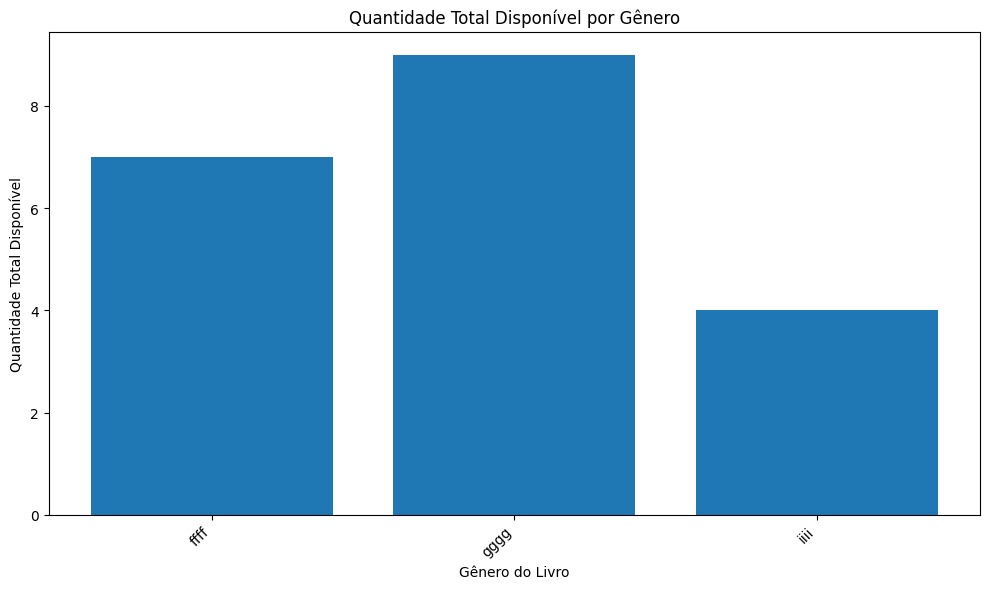

In [ ]:
#Passo 1: Definir a classe Livro
#Comece definindo a estrutura básica de um livro
#usando uma classe em Python. Cada livro terá atributos
#como título, autor, gênero e quantidade disponível
from matplotlib.pyplot import title
class Livro:
    def __init__(self, titulo, autor, genero, quantidade_disponivel):
        self.titulo = titulo
        self.autor = autor
        self.genero = genero
        self.quantidade_disponivel = quantidade_disponivel

    def __str__(self):

        return f"{self.titulo:>6}{self.autor:>10}{self.genero:>8}{self.quantidade_disponivel:>13}"
# Passo 2: Criar a lista de livros
# Inicialize uma lista vazia para armazenar os livros que serão cadastrados.
livros = []
#Passo 3: Implementar funções para gerenciar os livros
#Função para cadastrar um novo livro
#Função para listar todos os livro

def cadastrar_livro(lista_livros):
    while True:
        print("\nCadastro de Novo Livro")
        titulo = input("Título: ")
        autor = input("Autor: ")
        genero = input("Gênero: ")

        try:
            quantidade_disponivel = int(input("Quantidade disponível: "))
        except ValueError:
            print(" Entrada inválida. Usando 0 como quantidade.")
            quantidade_disponivel = 0

        novo_livro = Livro(titulo, autor, genero, quantidade_disponivel)
        lista_livros.append(novo_livro)
        print(f"\n Livro '{titulo}' cadastrado com sucesso!\n")

        resp = input("Deseja cadastrar outro livro? (s/n): ").lower()
        if resp != 's':

            print("~~"*15)
            print("    Livros da biblioteca")
            print("~~"*15)
            break

print('~~'*15)
print('Cadastro de livros da biblioteca')
print('~~'*15)


# Cadastrando dois livros
cadastrar_livro(livros)
print(f'{"Titulo":>6}{"Autor":>10}{"Genero":>8}{"Quantidade":>13}')
print("-"*50)
# Exibindo os livros cadastrados


for livro in livros:
    print(livro)
    print("-"*50)
def buscar_livro_por_titulo(lista_livros, titulo_busca):
    print(f"\n Buscando livro com título: '{titulo_busca}'")
    encontrado = False
while True:
    titulo_busca = input("Digite o título do livro a ser buscado (ou 's' para sair): ")
    if titulo_busca.lower() == 's':
        break

    for livro in livros:
        if livro.titulo.lower() == titulo_busca.lower():
            print("\n Livro encontrado:")
            print(f" Título: {livro.titulo}")
            print(f" Autor: {livro.autor}")
            print(f" Gênero: {livro.genero}")
            print(f" Quantidade disponível: {livro.quantidade_disponivel}")
            encontrado = True
            break

    if not encontrado:
        print(" Livro não encontrado.")
import matplotlib.pyplot as plt
import pandas as pd

# Criar um DataFrame a partir dos dados dos livros
df = pd.DataFrame([vars(livro) for livro in livros])

# Agrupar por gênero e somar as quantidades disponíveis
quantidade_por_genero = df.groupby('genero')['quantidade_disponivel'].sum().reset_index()

# Criar o gráfico de barras para quantidade por gênero
plt.figure(figsize=(10, 6))
plt.bar(quantidade_por_genero['genero'], quantidade_por_genero['quantidade_disponivel'])
plt.xlabel("Gênero do Livro")
plt.ylabel("Quantidade Total Disponível")
plt.title("Quantidade Total Disponível por Gênero")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()








# Task
Add error handling to the entire code for book registration, listing, searching, and graph generation.

## Review and enhance book registration error handling

### Subtask:
Improve the error handling in the `cadastrar_livro` function to better manage invalid input types or empty fields.


**Reasoning**:
The subtask is to improve error handling in the `cadastrar_livro` function. This involves adding try-except blocks and checks for empty strings to handle invalid input.



In [ ]:
def cadastrar_livro(lista_livros):
    while True:
        print("\nCadastro de Novo Livro")
        try:
            titulo = input("Título: ")
            if not titulo:
                print("Erro: O título não pode ser vazio.")
                continue

            autor = input("Autor: ")
            if not autor:
                print("Erro: O autor não pode ser vazio.")
                continue

            genero = input("Gênero: ")
            if not genero:
                print("Erro: O gênero não pode ser vazio.")
                continue

            quantidade_disponivel = int(input("Quantidade disponível: "))

            novo_livro = Livro(titulo, autor, genero, quantidade_disponivel)
            lista_livros.append(novo_livro)
            print(f"\n Livro '{titulo}' cadastrado com sucesso!\n")

            resp = input("Deseja cadastrar outro livro? (s/n): ").lower()
            if resp != 's':
                print("~~"*15)
                print("    Livros da biblioteca")
                print("~~"*15)
                break

        except ValueError:
            print("Erro: Entrada inválida para quantidade. Usando 0 como quantidade.")
            quantidade_disponivel = 0
            # Como encontramos um ValueError para quantidade, devemos continuar o loop
            # para solicitar novamente todas as entradas para este livro
            continue

## Add error handling for empty book list

### Subtask:
Modify the code that lists and searches for books to handle cases where the `livros` list is empty to avoid errors.


**Reasoning**:
Implement the error handling for listing and searching for books by checking if the 'livros' list is empty before proceeding.



In [ ]:
#  Função para listar todos os livros (modificada)
def listar_livros(lista_livros):
    if not lista_livros:
        print("\nNão há livros registrados na biblioteca.")
        return

    print("~~"*15)
    print("    Livros da biblioteca")
    print("~~"*15)
    print(f'{"Titulo":<15}{"Autor":<15}{"Genero":<15}{"Quantidade":<15}')
    print("-" * 60)

    for livro in lista_livros:
        print(f'{livro.titulo:<15}{livro.autor:<15}{livro.genero:<15}{livro.quantidade_disponivel:<15}')
        print("-" * 60)

# Função para buscar um livro pelo título (modificada)
def buscar_livro_por_titulo(lista_livros, titulo_busca):
    if not lista_livros:
        print("\nNão há livros para buscar na biblioteca.")
        return None  # Retornar Nenhum ou tratar conforme apropriado

    print(f"\n Buscando livro com título: '{titulo_busca}'")
    encontrado = False

    for livro in lista_livros:
        if livro.titulo.lower() == titulo_busca.lower():
            print("\n Livro encontrado:")
            print(f" Título: {livro.titulo}")
            print(f" Autor: {livro.autor}")
            print(f" Gênero: {livro.genero}")
            print(f" Quantidade disponível: {livro.quantidade_disponivel}")
            encontrado = True
            return livro  # Retornar o objeto livro encontrado

    if not encontrado:
        print(" Livro não encontrado.")
        return None

# Modifique o loop principal para usar as funções atualizadas
print('~~'*15)
print('Cadastro de livros da biblioteca')
print('~~'*15)

# Supondo que cadastrar_livro esteja definido em outro lugar e seja adicionado à lista de 'livros'
# cadastrar_livro(livros)
# Mantenha esta chamada se quiser adicionar livros primeiro
# Listar livros após possível registro
listar_livros(livros)

# Pesquisar um livro após possível registro
while True:
    titulo_busca = input("Digite o título do livro a ser buscado (ou 's' para sair): ")
    if titulo_busca.lower() == 's':
        break
    buscar_livro_por_titulo(livros, titulo_busca)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cadastro de livros da biblioteca
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    Livros da biblioteca
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Titulo         Autor          Genero         Quantidade     
------------------------------------------------------------
aaa            sss            ddd            5              
------------------------------------------------------------
www            rrr            ttt            7              
------------------------------------------------------------
ggg            jjj            kkk            9              
------------------------------------------------------------
Digite o título do livro a ser buscado (ou 's' para sair): 4

 Buscando livro com título: '4'
 Livro não encontrado.
Digite o título do livro a ser buscado (ou 's' para sair): ggg

 Buscando livro com título: 'ggg'

 Livro encontrado:
 Título: ggg
 Autor: jjj
 Gênero: kkk
 Quantidade disponível: 9
Digite o título do livro a ser 